Djikstra implementation in python <br>
Will generate a random graph and return the minimum cost and path between two nodes

Rolled my own MinPQ before learning about https://docs.python.org/3/library/heapq.html<br>
Maybe now I'll learn to read to read the docs first

In [625]:
class MinPQ:
    def __init__(self):
        self.queue = []

    def add(self, node_to, node_from, weight):
        self.queue.append([node_to, node_from, weight])
        for i in range(len(self.queue)):
            for j in range(len(self.queue)):
                if (self.queue[i][2] < self.queue[j][2]):
                    temp = self.queue[j]
                    self.queue[j] = self.queue[i]
                    self.queue[i] = temp   

    def pop(self):
        return self.queue.pop(0) 

    def isEmpty(self):
        return len(self.queue) == 0

    def getQueue(self):
        return self.queue                

Graph data structure with some matplotlib visuals as well <br>
Needs a TLC (tender love and care) refactor 

In [626]:
import matplotlib.pyplot as plt
import random
import sys

class Graph:
    def __init__(self, num_nodes=10):
        self.adj_list = []
        self.edge_weight = []
        self.num_nodes = num_nodes
        self.edges = 0
        for i in range(self.num_nodes):
            self.adj_list.append([])
            self.edge_weight.append([])

    def add(self, node_from, node_to, weight):
        assert(node_from < self.num_nodes)
        assert(node_to < self.num_nodes)
        assert(weight >= 0)
        self.adj_list[node_from].append(node_to)
        self.edge_weight[node_from].append(weight)
        self.edges += 1

    def getDeg(self, node):
        return len(self.adj_list[node])

    def print(self):
        for i in range(self.num_nodes):
            if len(self.adj_list[i]) == 0: continue
            print('\nOut Deg(' + str(i) + ') = ' + str(self.getDeg(i)))
            count = 0
            for node_to in self.adj_list[i]:
                print(str(i) + ' -> ' + str(node_to) + ", weight " + str(self.edge_weight[i][count]))
                count += 1  

    def drawGraph(self):
        plt.title("Aren't Graphs Great!")
        plt.xlim(-80,2400)
        plt.ylim(-20,2000)  
        y = self.getRand(-15, 1800, self.edges)
        print(len(y))
        amp = 520
        for i in range(self.num_nodes):
            plt.plot([i*amp], [y[i]], marker="o", markersize=20)
            plt.text(i*amp, y[i], str(i))
            count = 0
            for node in self.adj_list[i]:
                plt.plot([i*amp, node*amp],  [y[i], y[node]], linestyle="--")
                plt.text((i*amp + node*amp) / 2, (y[i] + y[node]) / 2, self.edge_weight[i][count], fontsize=8)
                plt.text((i*amp + node*amp) / 2, ((y[i] + y[node]) / 2)-80, str(i) + " -> " + str(node), fontsize=8)
                count += 1
        plt.show()     

    def shortestPath(self, start, end):
        min_pq = MinPQ()
        min_costs = []
        marked = []
        visited = []
        path = []

        for i in range(self.num_nodes):
            min_costs.append(sys.maxsize)
            marked.append(False)

        min_costs[start] = 0
        marked[start] = True
        min_pq.add(start, -1, 0)
        path.append(end)
        while (not min_pq.isEmpty()):
            node, prev, weight = min_pq.pop()
            visited.append([node, prev]) 
            if node == end:
                # end node found
                # build the min cost path
                path.append(prev)
                curr = prev
                idx = len(visited) - 2
                while idx >= 0:
                    if visited[idx][0] == curr:
                        curr = visited[idx][1]
                        if visited[idx][1] == start:
                            path.append(start)
                            break
                        if visited[idx][1] != -1:
                            path.append(visited[idx][1])
                    elif visited[idx][1] == curr and curr != -1 and curr not in path:
                        path.append(visited[idx][1]) 
                        curr = visited[idx][1]
                    idx -= 1
                path.reverse()  
                break

            marked[node] = True
            adj_list = self.adj_list[node]
            weights = self.edge_weight[node]
            for i in range(len(adj_list)):
                if (marked[adj_list[i]] == True): continue
                dist = min_costs[node] + weights[i]
                if (dist < min_costs[adj_list[i]]):
                    min_costs[adj_list[i]] = dist
                    min_pq.add(adj_list[i], node, weights[i]) 

        # somehow returning 3?? values here
        return (min_costs[end], path) if min_costs[end] != sys.maxsize else (None, None)
    
    def getRand(self, start, end, count):
        ret = []
        for i in range(count):
            ret.append(random.randint(start, end))
        return ret    
    
    def checkNodes(self, node_one, node_two, used_nodes):
        ret = True
        if node_one == node_two: ret = False
        if (node_one, node_two) in used_nodes: ret = False
        if (node_two, node_one) in used_nodes: ret = False
        return ret

Sample driver code

8


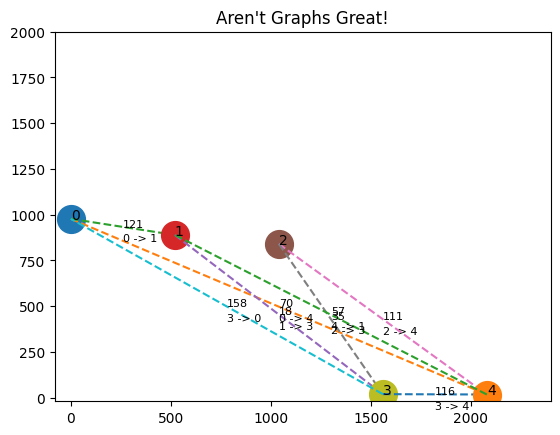

(75, [4, 1, 3])
Path from 4 -> 3 cost 75
[4, 1, 3]


In [627]:
nodes = 5
g = Graph(num_nodes=nodes)
num_edges = nodes*4
nodes_from = g.getRand(0, nodes-1, num_edges)
nodes_to = g.getRand(0, nodes-1, num_edges)
weights = g.getRand(10, 300, num_edges)
used_nodes = []

for i in range(num_edges):
    if g.checkNodes(nodes_from[i], nodes_to[i], used_nodes): 
        g.add(nodes_from[i], nodes_to[i], weights[i])
        used_nodes.append((nodes_from[i], nodes_to[i]))

g.drawGraph()
start, end = g.getRand(0, nodes-1, 2)
while (start == end):
    start, end = g.getRand(0, nodes-1, 2) # make sure start and end are different

ret, path = g.shortestPath(start, end)
str_ret = "Path from " + str(start) + " -> " + str(end) + " cost " + str(ret) + "\n" + str(path)
print(str_ret if ret != None else "no path from " + str(start) + " -> " + str(end))